In [43]:
# üìä Evaluaci√≥n de la Red Neuronal Convolucional (CNN)

# üîß Cargar librer√≠as
import os
import sys
sys.path.append("../src")

import yaml
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

import evaluate as ev
import utils

In [44]:
# üìÅ Cargar configuraci√≥n
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [45]:
# üìÇ Cargar generador de validaci√≥n
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_path = os.path.join(config["paths"]["prepared_data"], "val")
img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 355 images belonging to 54 classes.


In [46]:
# üíæ Cargar modelo entrenado
model_path = config["paths"]["model"]
model = load_model(model_path)

In [47]:
# üîÆ Predecir probabilidades
y_scores = model.predict(val_generator)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

 1/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 110ms/step

/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 34ms/step


In [48]:
# üî¢ Convertir predicciones a clases
y_pred = np.argmax(y_scores, axis=1)

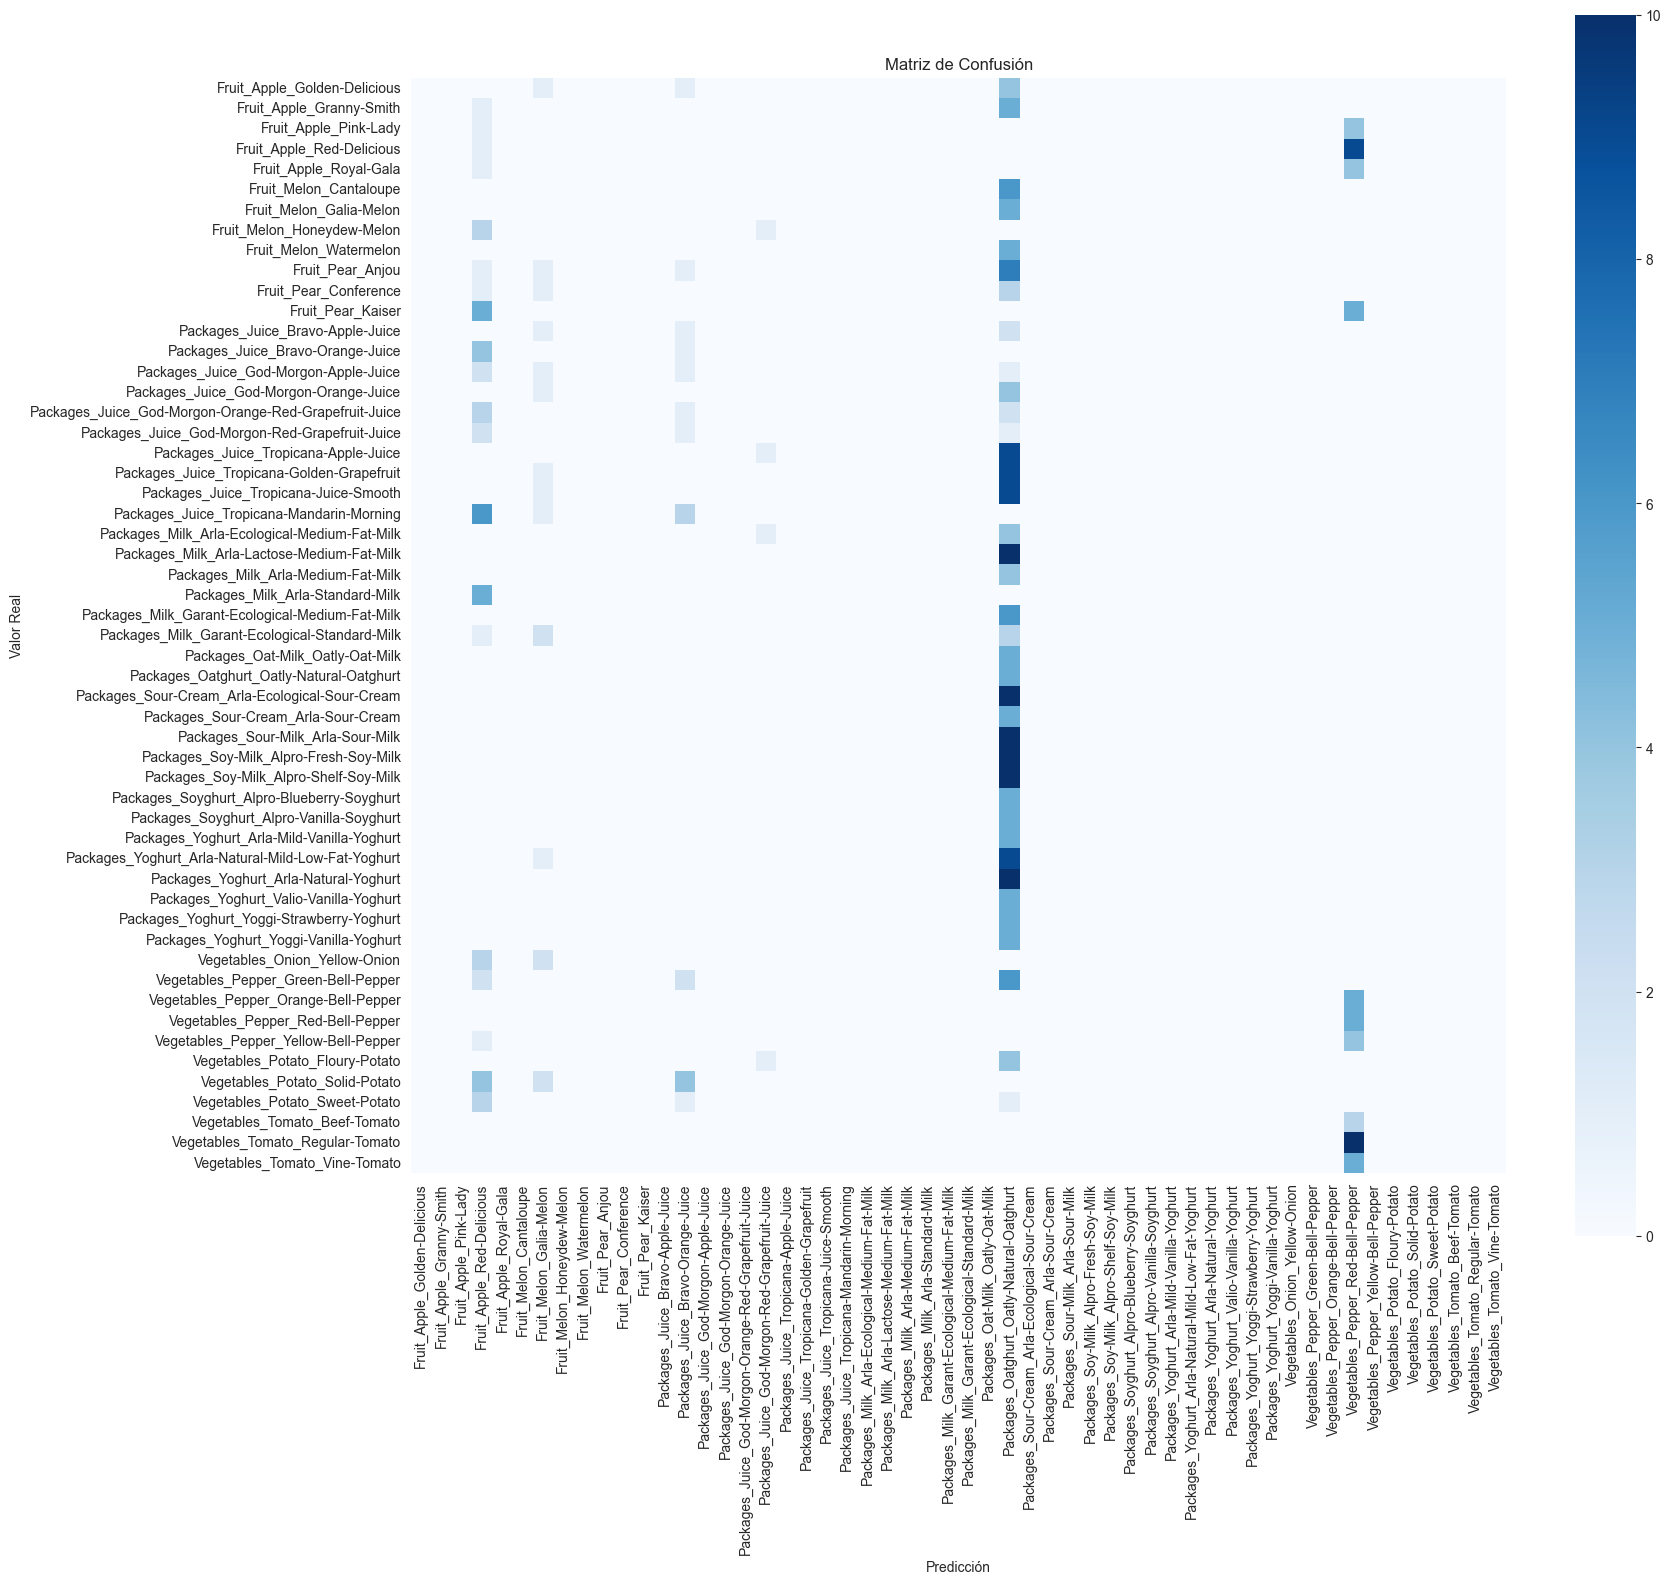

In [49]:
# üìâ Matriz de Confusi√≥n multiclase
ev.plot_confusion_matrix(y_true, y_pred, class_names=class_names)

In [50]:
# üß™ M√©tricas de clasificaci√≥n
from sklearn.metrics import classification_report

# ‚úÖ Mostrar m√©tricas por clase
print("üìÑ Reporte de clasificaci√≥n por clase:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

üìÑ Reporte de clasificaci√≥n por clase:
                                                       precision    recall  f1-score   support

                         Fruit_Apple_Golden-Delicious       0.00      0.00      0.00         6
                             Fruit_Apple_Granny-Smith       0.00      0.00      0.00         6
                                Fruit_Apple_Pink-Lady       0.00      0.00      0.00         5
                            Fruit_Apple_Red-Delicious       0.02      0.10      0.03        10
                               Fruit_Apple_Royal-Gala       0.00      0.00      0.00         5
                               Fruit_Melon_Cantaloupe       0.00      0.00      0.00         6
                              Fruit_Melon_Galia-Melon       0.00      0.00      0.00         5
                           Fruit_Melon_Honeydew-Melon       0.00      0.00      0.00         4
                               Fruit_Melon_Watermelon       0.00      0.00      0.00         5
       

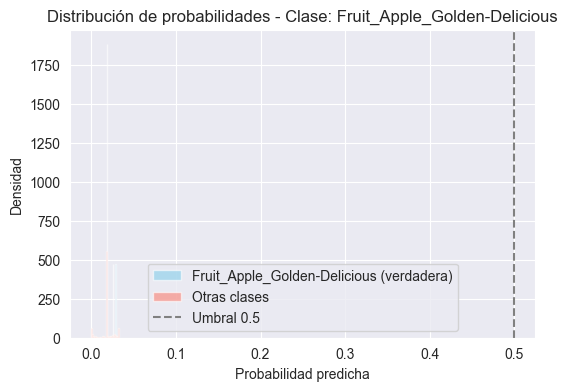

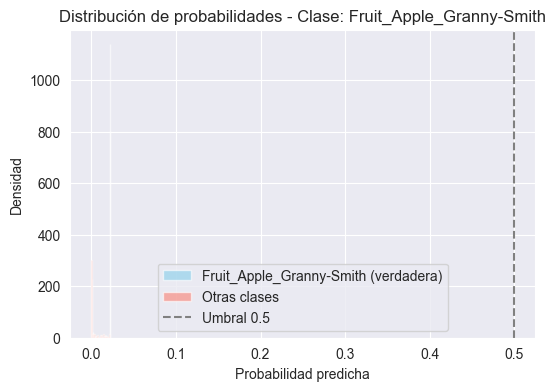

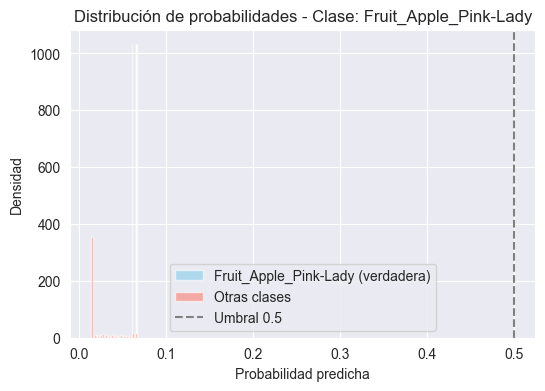

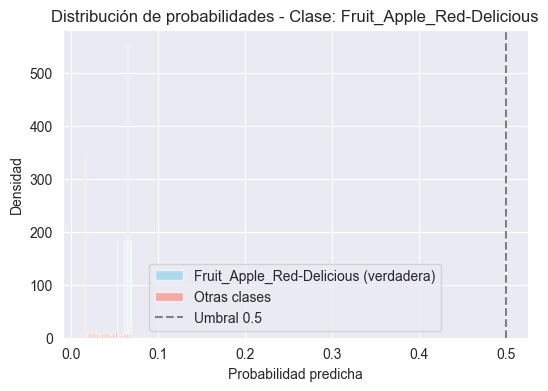

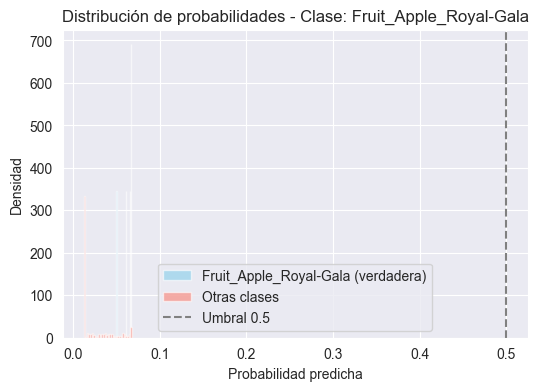

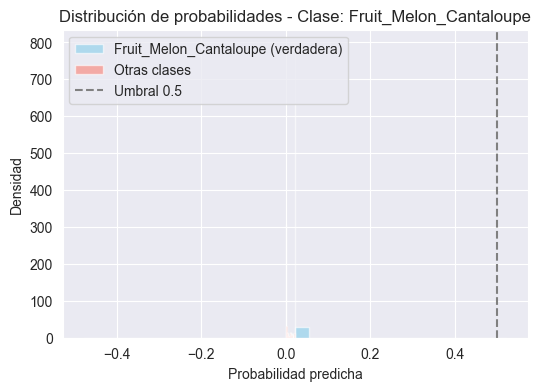

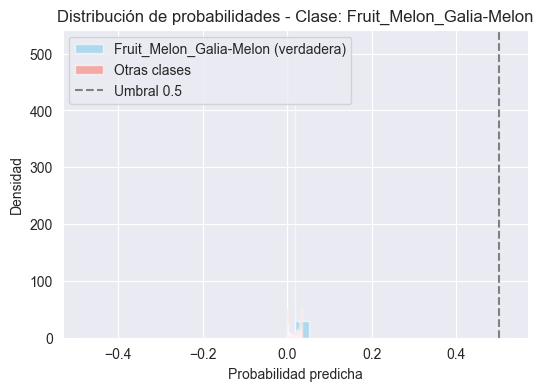

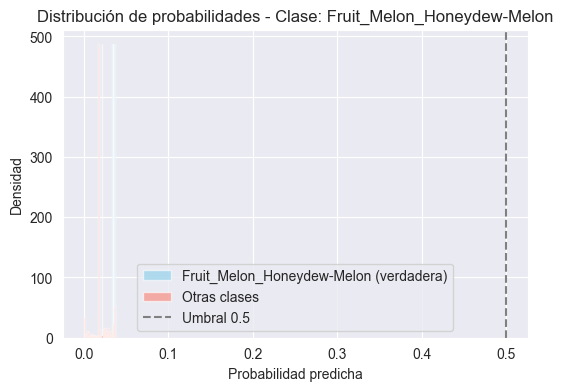

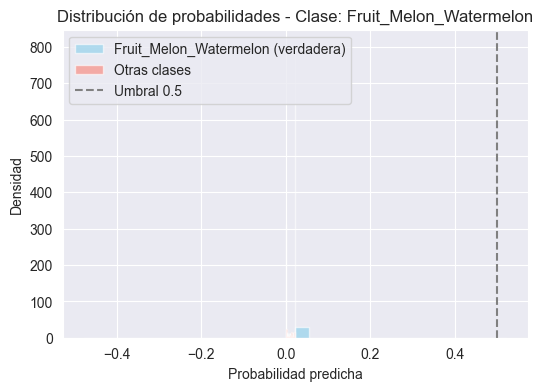

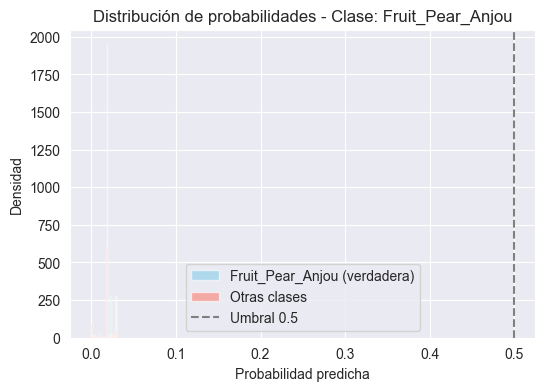

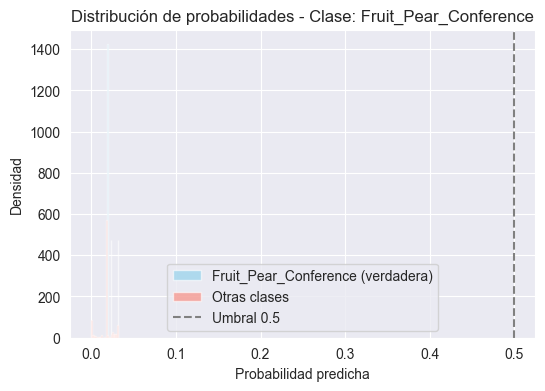

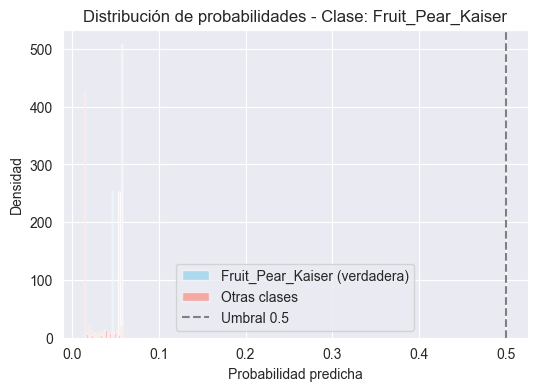

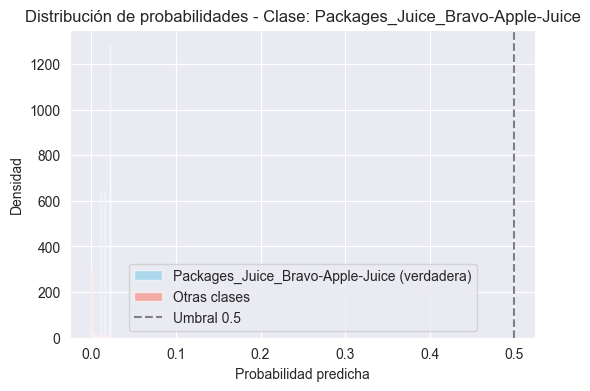

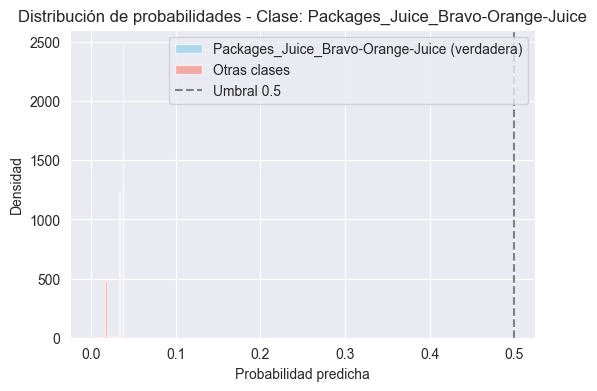

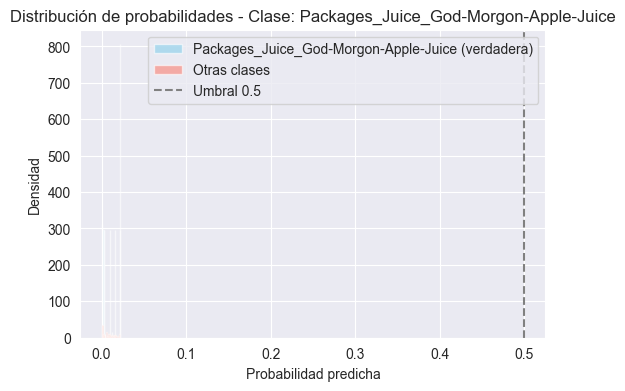

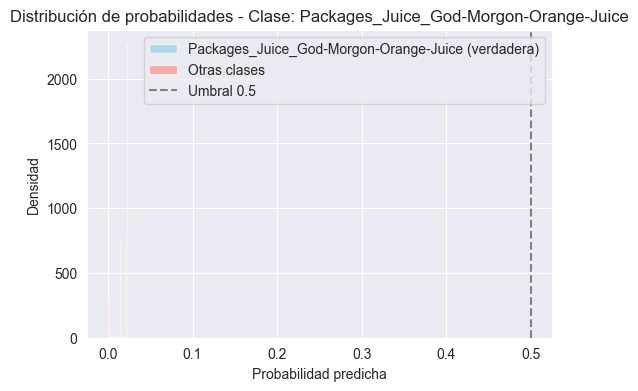

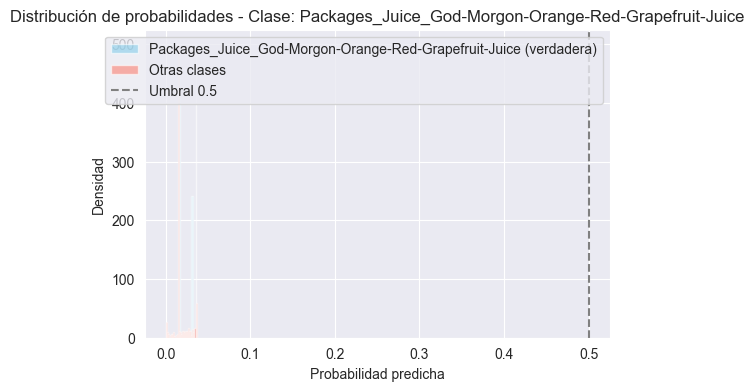

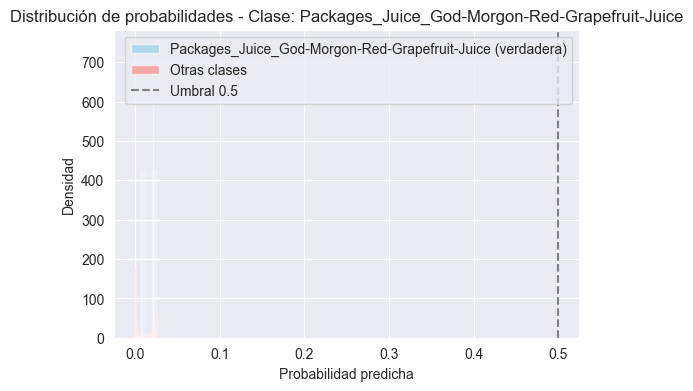

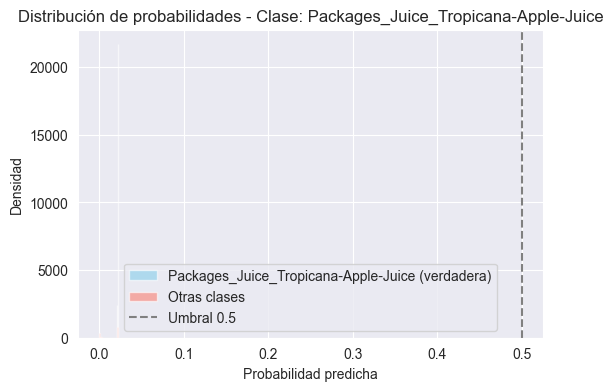

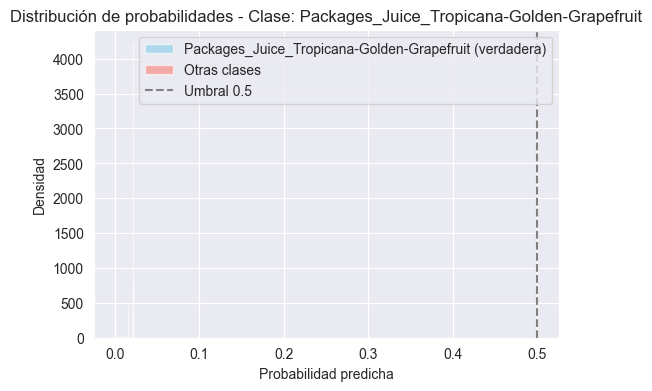

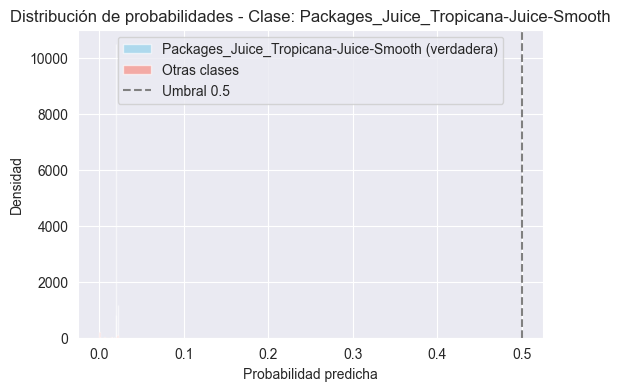

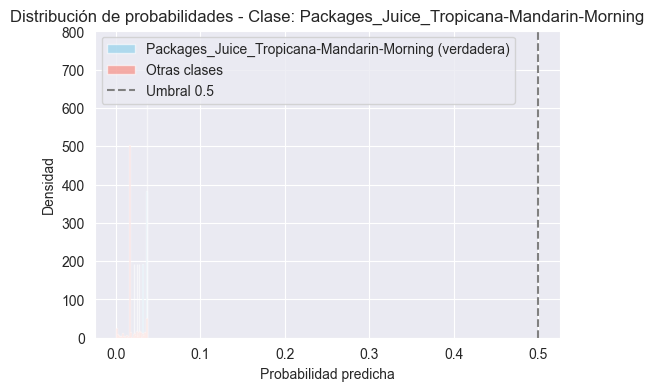

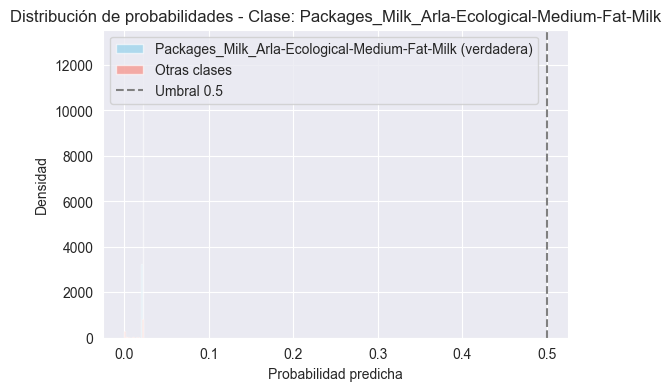

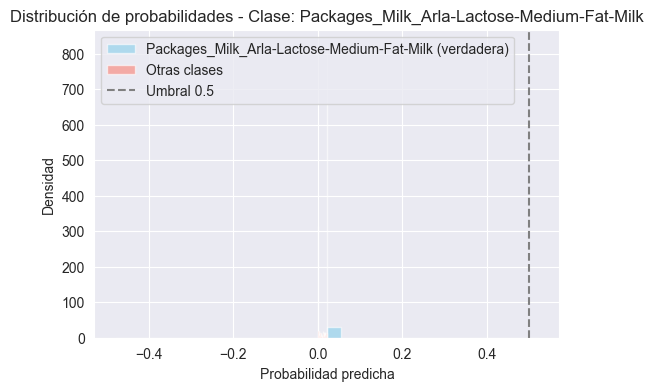

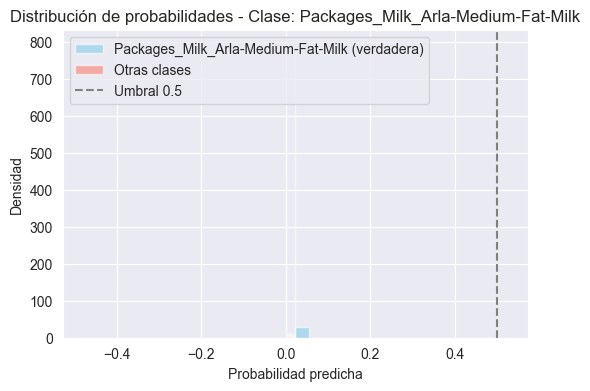

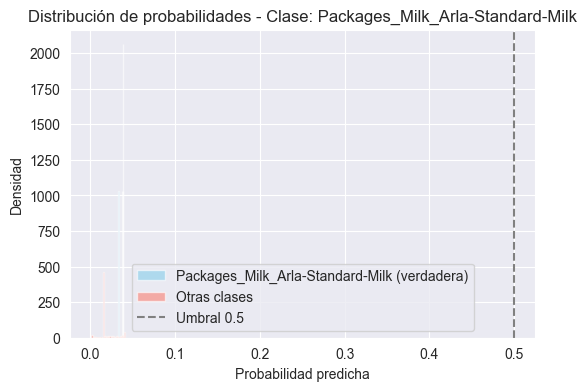

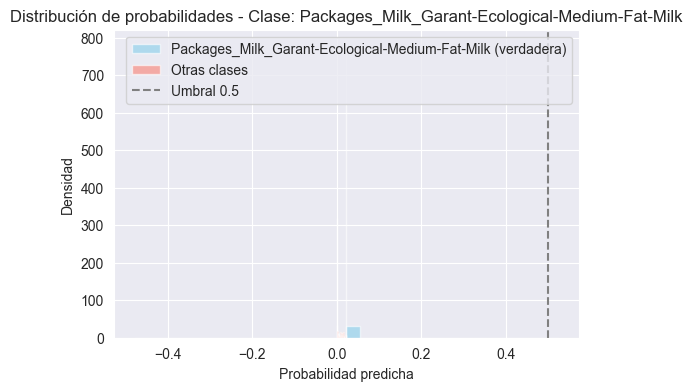

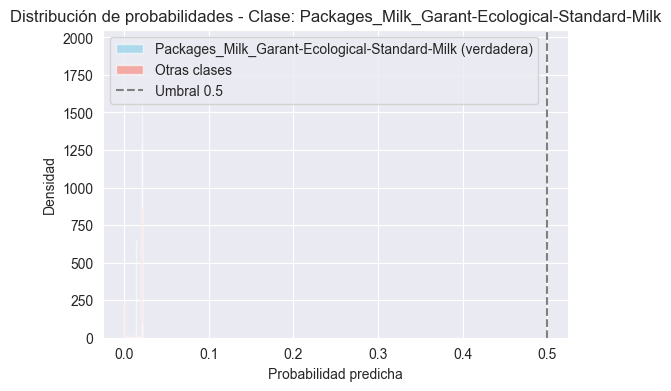

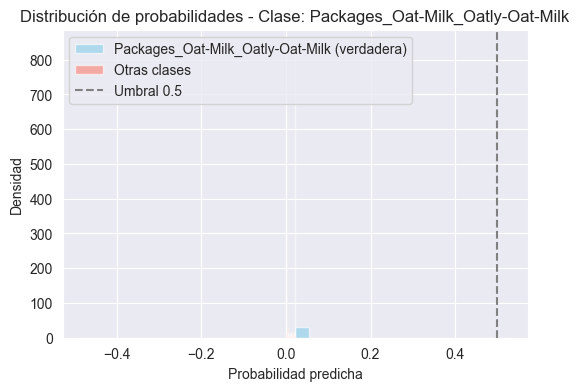

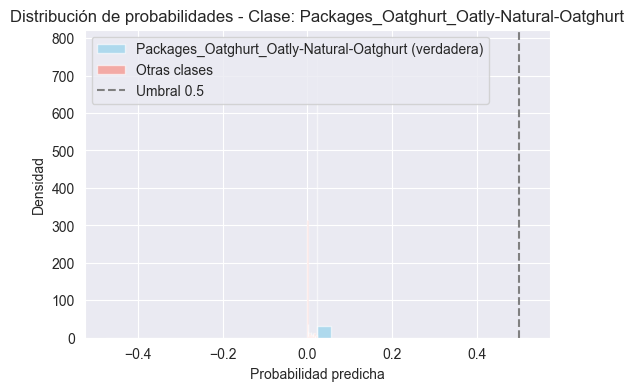

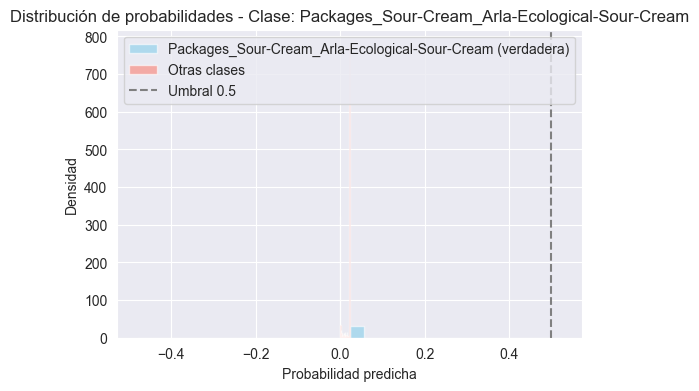

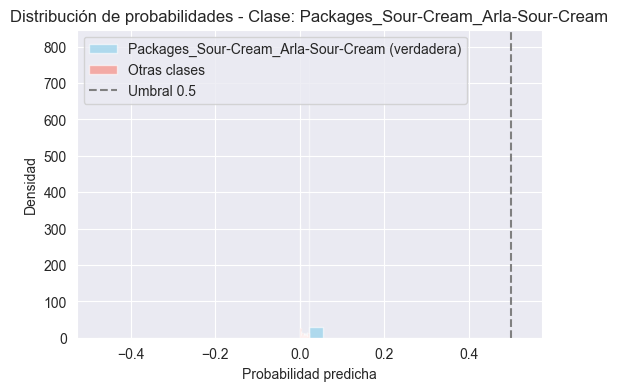

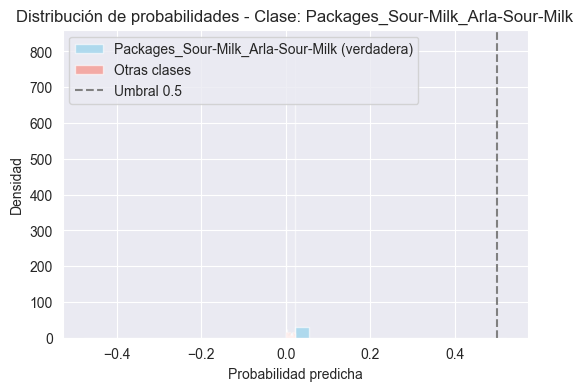

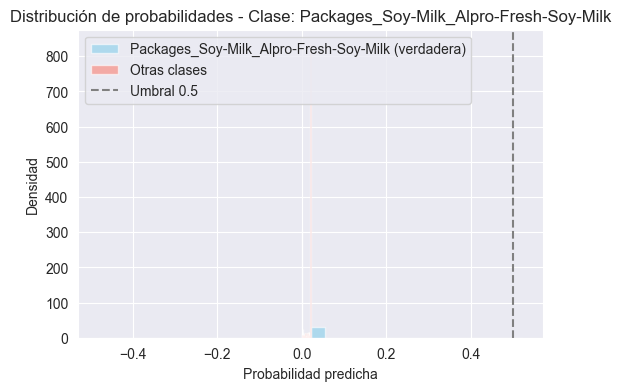

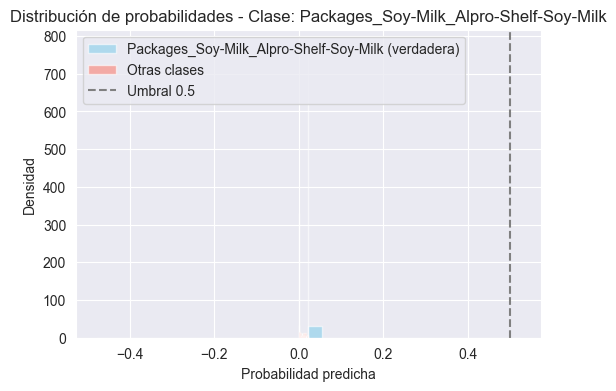

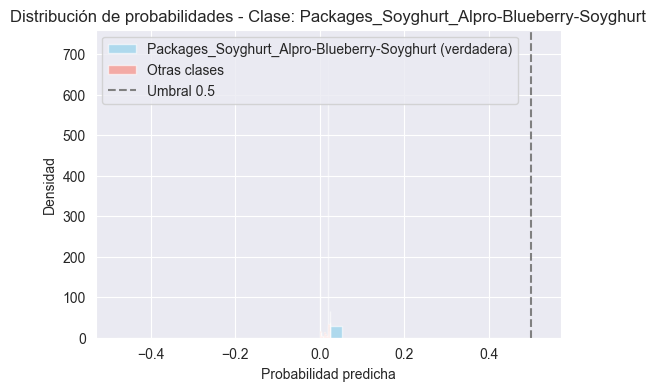

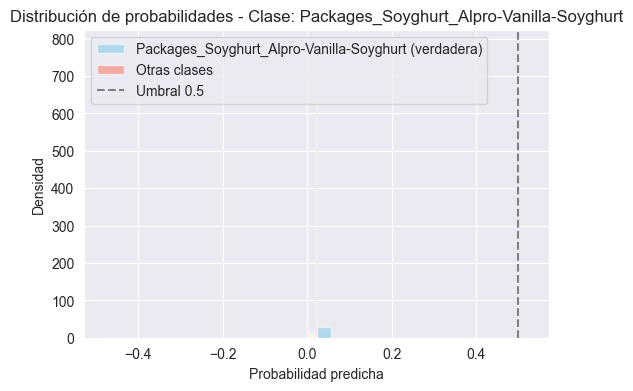

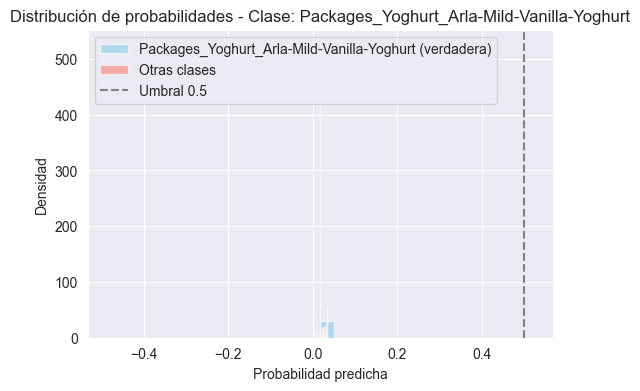

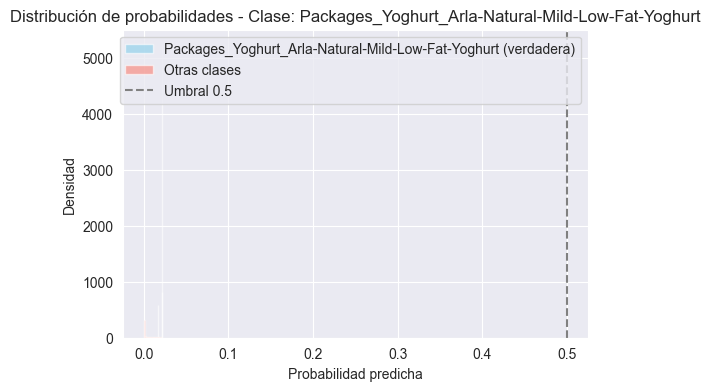

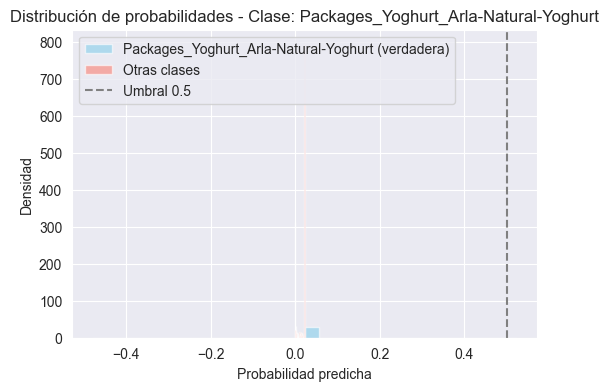

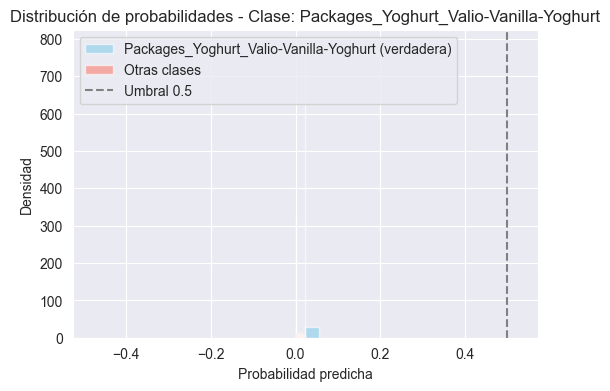

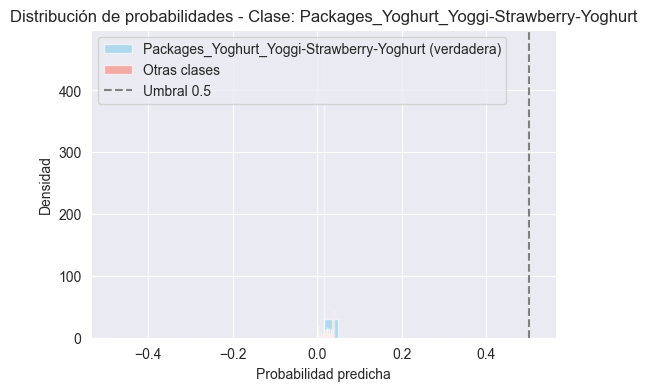

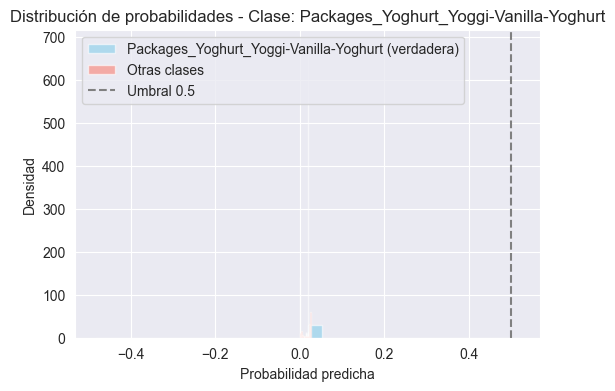

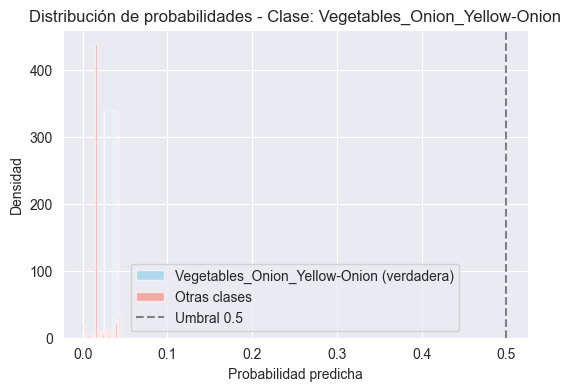

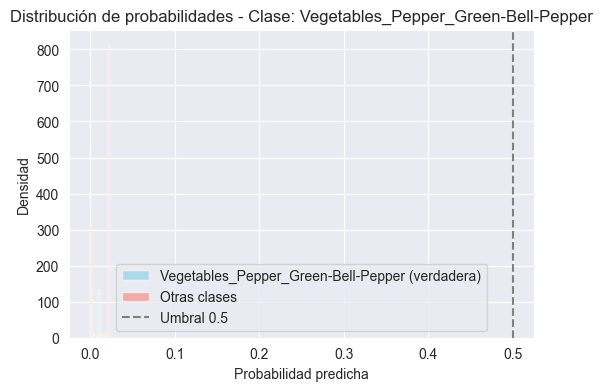

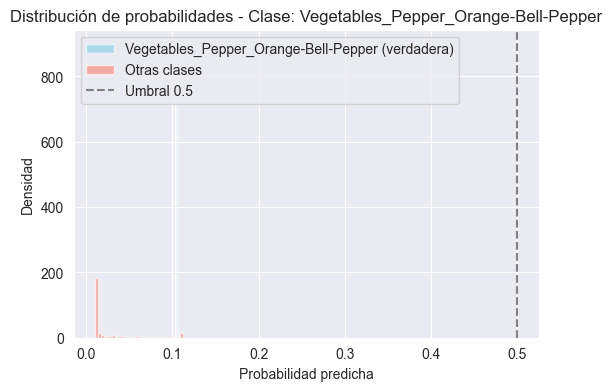

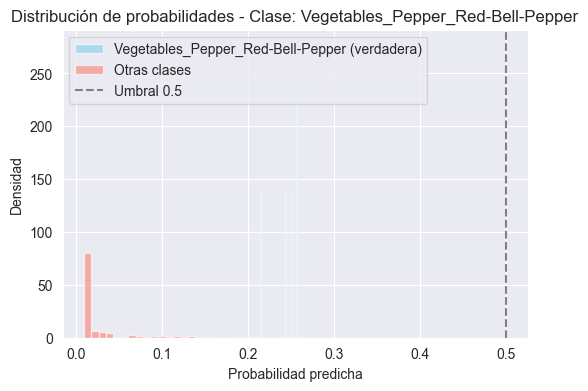

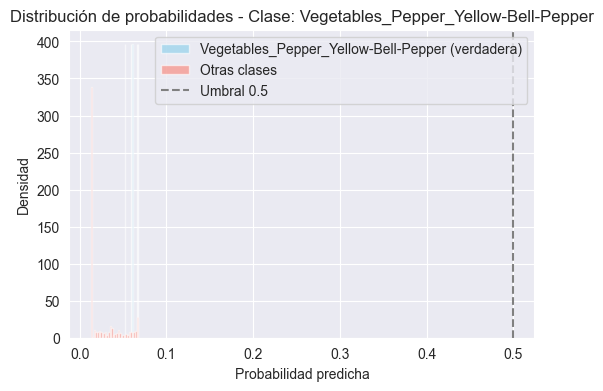

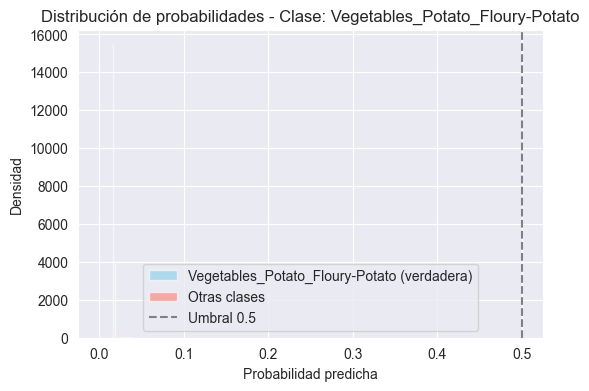

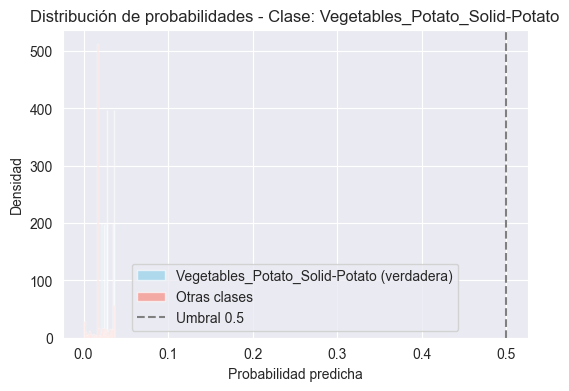

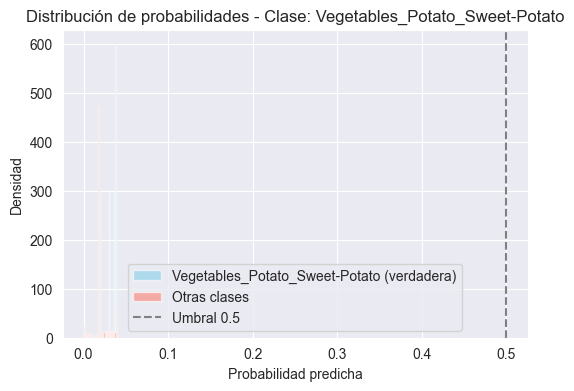

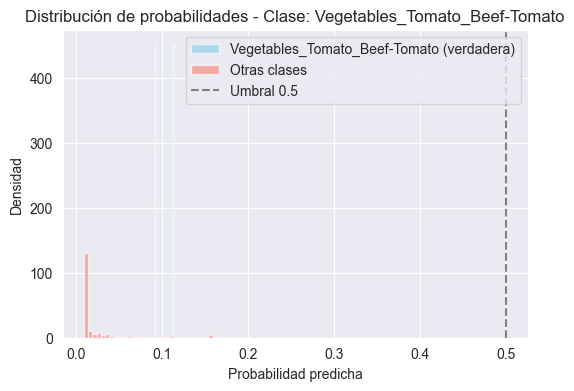

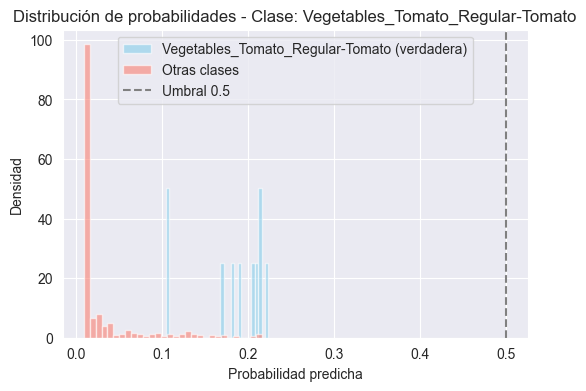

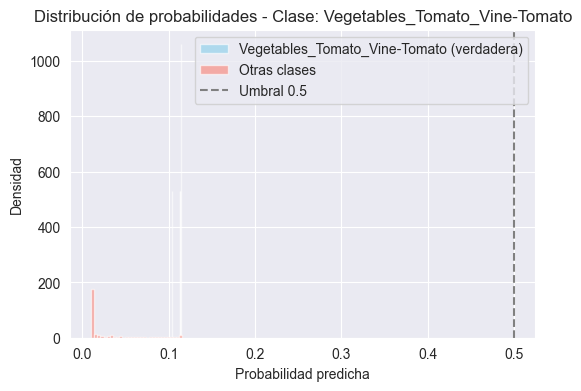

In [51]:
# üìà Distribuci√≥n de probabilidades para cada clase
for i, class_name in enumerate(class_names):
    ev.plot_prediction_distribution(y_true, y_scores[:, i], class_index=i, class_name=class_name)

In [52]:
# ‚úÖ Reflexi√≥n final
print("‚úÖ Evaluaci√≥n completa. Analiza si hay overfitting, errores sistem√°ticos o clases mal representadas.")

‚úÖ Evaluaci√≥n completa. Analiza si hay overfitting, errores sistem√°ticos o clases mal representadas.
